## Into DeepTrain
DeepTrain requires only (1) a compiled model and (2) data directory to run.<br>
This example covers these and a bit more to keep truer to standard use.

In [1]:
import os
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.models import Model

from deeptrain import TrainGenerator, DataGenerator

### Model maker
Begin by defining a model maker function. Input should specify hyperparameters, optimizer, learning rate, etc;<br> this is the "blueprint" which is later saved.

In [2]:
def make_model(batch_shape, optimizer, loss, metrics, num_classes,
               filters, kernel_size):
    ipt = Input(batch_shape=batch_shape)

    x = Conv2D(filters, kernel_size, activation='relu', padding='same')(ipt)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(num_classes)(x)

    out = Activation('softmax')(x)

    model = Model(ipt, out)
    model.compile(optimizer, loss, metrics=metrics)
    return model

### Model configs
Define configs dictionary to feed as `**kwargs` to `make_model`; we'll also pass it to TrainGenerator,<br>
which will save it and show in a "report" for easy reference

In [3]:
batch_size = 128
width, height, channels = 28, 28, 1  # MNIST dims (28 x 28 pixels, greyscale)

MODEL_CFG = dict(
    batch_shape=(batch_size, width, height, channels),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam',
    num_classes=10,
    filters=16,
    kernel_size=(3, 3),
)

### DataGenerator (train) configs
- `data_path`:    directory where image data is located
- `labels_path`: where labels file is located
- `batch_size`:  number of samples to feed at once to model
- `shuffle`:     whether to shuffle data at end of each epoch
- `superbatch_set_nums`: which files to load into a `superbatch`, which holds batches persisently in memory <br> 
  (as opposed to `batch`, which is overwritten after use). Since MNIST is small, we can load it all into RAM.

In [4]:
datadir = os.path.join("dir", "data", "image")
DATAGEN_CFG = dict(
    data_path=os.path.join(datadir, 'train'),
    labels_path=os.path.join(datadir, 'train', 'labels.h5'),
    batch_size=batch_size,
    shuffle=True,
    superbatch_set_nums='all',
)

### DataGenerator (validation) configs

In [5]:
VAL_DATAGEN_CFG = dict(
    data_path=os.path.join(datadir, 'val'),
    labels_path=os.path.join(datadir, 'val', 'labels.h5'),
    batch_size=batch_size,
    shuffle=False,
    superbatch_set_nums='all',
)

### TrainGenerator configs
-   `epochs`:   number of epochs to train for
-   `logs_dir`: where to save TrainGenerator state, model, report, and history
-   `best_models_dir`: where to save model when it achieves new best validation performance
-   `model_configs`: model configurations dict to save & write to report

In [6]:
TRAINGEN_CFG = dict(
    epochs=3,
    logs_dir=os.path.join('dir', 'logs'),
    best_models_dir=os.path.join('dir', 'models'),
    model_configs=MODEL_CFG,
)

### Create training objects

In [7]:
model       = make_model(**MODEL_CFG)
datagen     = DataGenerator(**DATAGEN_CFG)
val_datagen = DataGenerator(**VAL_DATAGEN_CFG)
traingen    = TrainGenerator(model, datagen, val_datagen, **TRAINGEN_CFG)

Discovered 48 files with matching format
Discovered dataset with matching format
48 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated

Discovered 36 files with matching format
Discovered dataset with matching format
36 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated

NOTE: no existing models detected in dir\logs; starting model_num from '0'
Preloading superbatch ... Discovered 48 files with matching format
................................................ finished, w/ 6144 total samples
Train initial data prepared
Preloading superbatch ... Discovered 36 files with matching format
.................................... finished, w/ 4608 total samples
Val initial data prepared
NOTE: no existing models detected in dir\logs; starting model_num from '0'
Logging ON; director

### Train


Fitting set 1...   (Loss, Acc) = (2.297301, 0.062500) 
Fitting set 2...   (Loss, Acc) = (2.292228, 0.078125) 
Fitting set 3...   (Loss, Acc) = (2.280833, 0.122396) 
Fitting set 4...   (Loss, Acc) = (2.268434, 0.152344) 
Fitting set 5...   (Loss, Acc) = (2.251584, 0.187500) 
Fitting set 6...   (Loss, Acc) = (2.239864, 0.201823) 
Fitting set 7...   (Loss, Acc) = (2.228770, 0.229911) 
Fitting set 8...   (Loss, Acc) = (2.214706, 0.265625) 
Fitting set 9...   (Loss, Acc) = (2.201900, 0.287326) 
Fitting set 10...  (Loss, Acc) = (2.189120, 0.307812) 
Fitting set 11...  (Loss, Acc) = (2.170205, 0.334517) 
Fitting set 12...  (Loss, Acc) = (2.154839, 0.352214) 
Fitting set 13...  (Loss, Acc) = (2.142305, 0.362981) 
Fitting set 14...  (Loss, Acc) = (2.126470, 0.380580) 
Fitting set 15...  (Loss, Acc) = (2.110874, 0.400521) 
Fitting set 16...  (Loss, Acc) = (2.096904, 0.412109) 
Fitting set 17...  (Loss, Acc) = (2.080665, 0.428768) 
Fitting set 18...  (Loss, Acc) = (2.065265, 0.440972) 
Fitting s

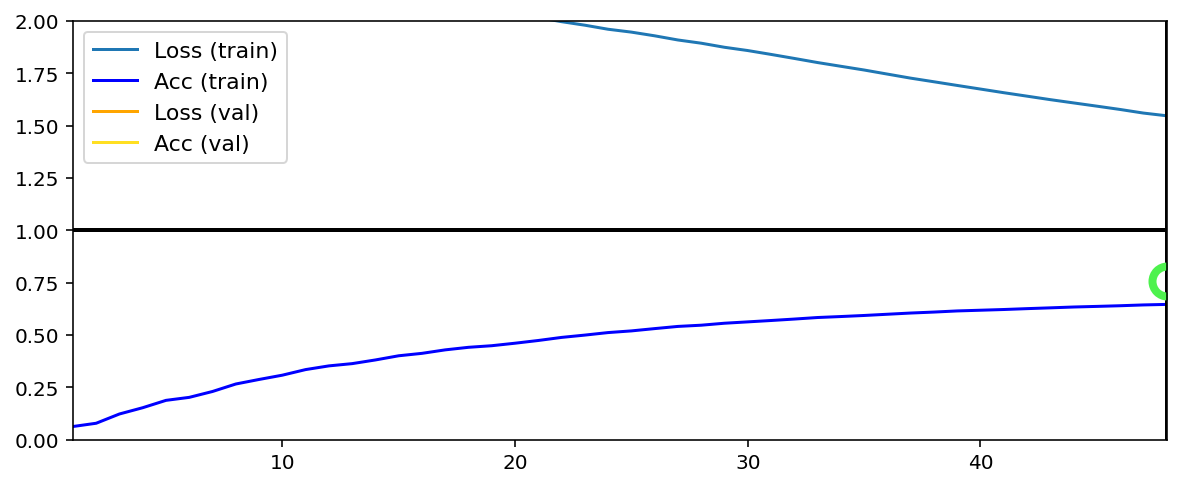


Fitting set 21...  (Loss, Acc) = (0.765751, 0.824219) 
Fitting set 27...  (Loss, Acc) = (0.727158, 0.841797) 
Fitting set 44...  (Loss, Acc) = (0.746188, 0.834635) 
Fitting set 3...   (Loss, Acc) = (0.730069, 0.838867) 
Fitting set 23...  (Loss, Acc) = (0.728389, 0.839844) 
Fitting set 31...  (Loss, Acc) = (0.720288, 0.835286) 
Fitting set 45...  (Loss, Acc) = (0.720948, 0.834263) 
Fitting set 22...  (Loss, Acc) = (0.704299, 0.837402) 
Fitting set 16...  (Loss, Acc) = (0.698179, 0.838108) 
Fitting set 38...  (Loss, Acc) = (0.691929, 0.833984) 
Fitting set 34...  (Loss, Acc) = (0.692961, 0.832031) 
Fitting set 1...   (Loss, Acc) = (0.680281, 0.838216) 
Fitting set 4...   (Loss, Acc) = (0.676445, 0.841046) 
Fitting set 37...  (Loss, Acc) = (0.663750, 0.845145) 
Fitting set 46...  (Loss, Acc) = (0.658366, 0.846094) 
Fitting set 12...  (Loss, Acc) = (0.649041, 0.846924) 
Fitting set 10...  (Loss, Acc) = (0.645140, 0.846278) 
Fitting set 32...  (Loss, Acc) = (0.640361, 0.846137) 
Fitting s

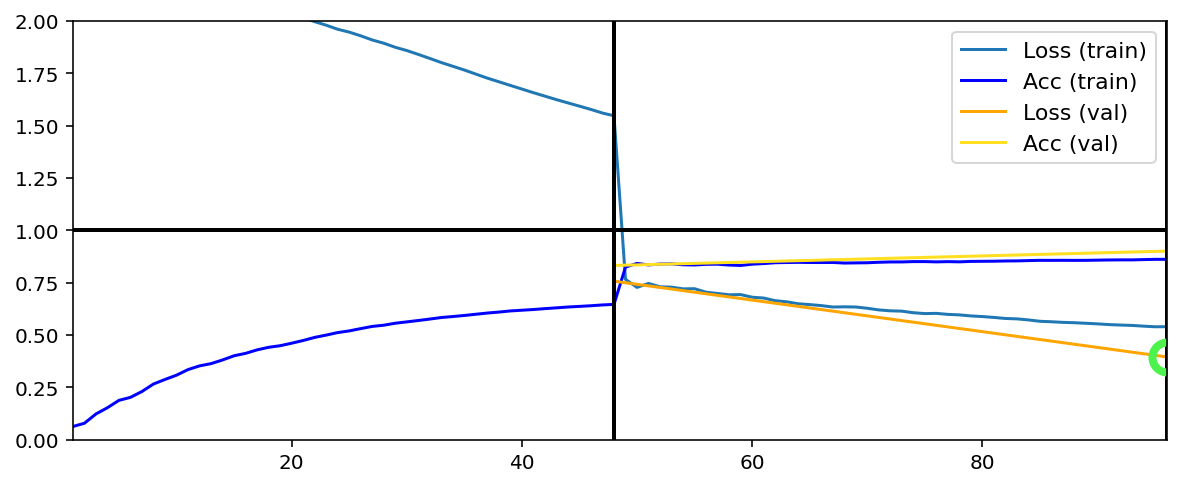


Fitting set 40...  (Loss, Acc) = (0.393554, 0.910156) 
Fitting set 30...  (Loss, Acc) = (0.389306, 0.912109) 
Fitting set 17...  (Loss, Acc) = (0.409685, 0.904948) 
Fitting set 10...  (Loss, Acc) = (0.399228, 0.899414) 
Fitting set 19...  (Loss, Acc) = (0.411247, 0.894531) 
Fitting set 9...   (Loss, Acc) = (0.411084, 0.888672) 
Fitting set 24...  (Loss, Acc) = (0.401326, 0.893415) 
Fitting set 14...  (Loss, Acc) = (0.403191, 0.895020) 
Fitting set 8...   (Loss, Acc) = (0.395733, 0.897135) 
Fitting set 35...  (Loss, Acc) = (0.398654, 0.895703) 
Fitting set 45...  (Loss, Acc) = (0.400620, 0.894531) 
Fitting set 15...  (Loss, Acc) = (0.395943, 0.894857) 
Fitting set 36...  (Loss, Acc) = (0.390992, 0.897536) 
Fitting set 4...   (Loss, Acc) = (0.390960, 0.898717) 
Fitting set 39...  (Loss, Acc) = (0.386528, 0.899740) 
Fitting set 43...  (Loss, Acc) = (0.386909, 0.899170) 
Fitting set 6...   (Loss, Acc) = (0.385125, 0.898667) 
Fitting set 16...  (Loss, Acc) = (0.383201, 0.899523) 
Fitting s

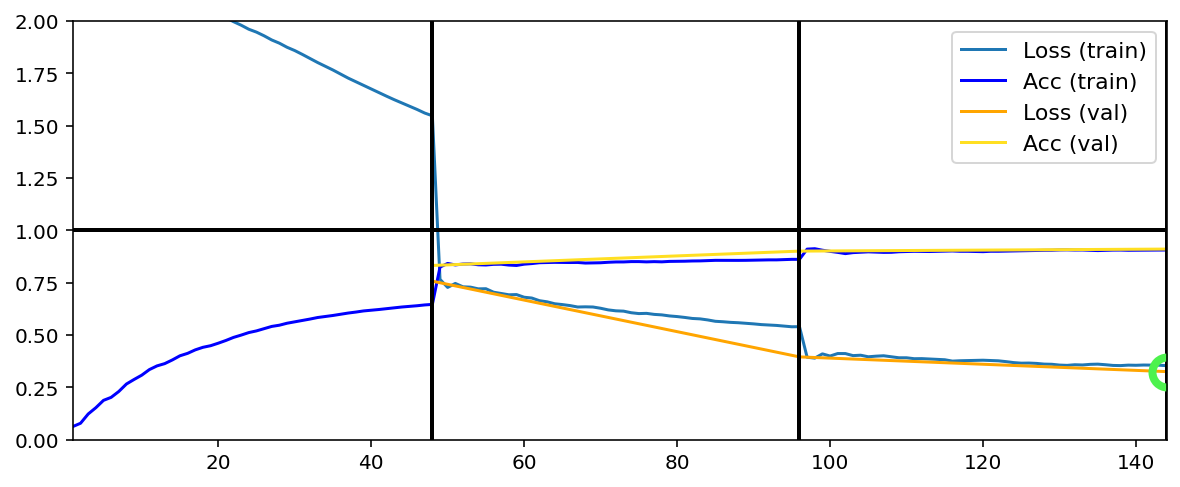

Training has concluded.


In [8]:
traingen.train()

### Delve deeper
DeepTrain offers much beyond the minimals; it's suggested to proceed with the advanced example before
exploring others.